# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Reading The Dataset

In [4]:
df = pd.read_csv("C:/Users/niran/Documents/VS Code/Python/Heart Disease Prediction Model/heart_statlog_cleveland_hungary_final.csv")

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Cleaning Data

Looking for data with null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

No null values are present in the dataset.

# Data Visualization

C:\Users\niran\AppData\Local\Temp\ipykernel_22272\1155832314.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  count_plt.set_xticklabels(["Normal", "Heart-Disease"])


[Text(0, 0, 'Normal'), Text(1, 0, 'Heart-Disease')]

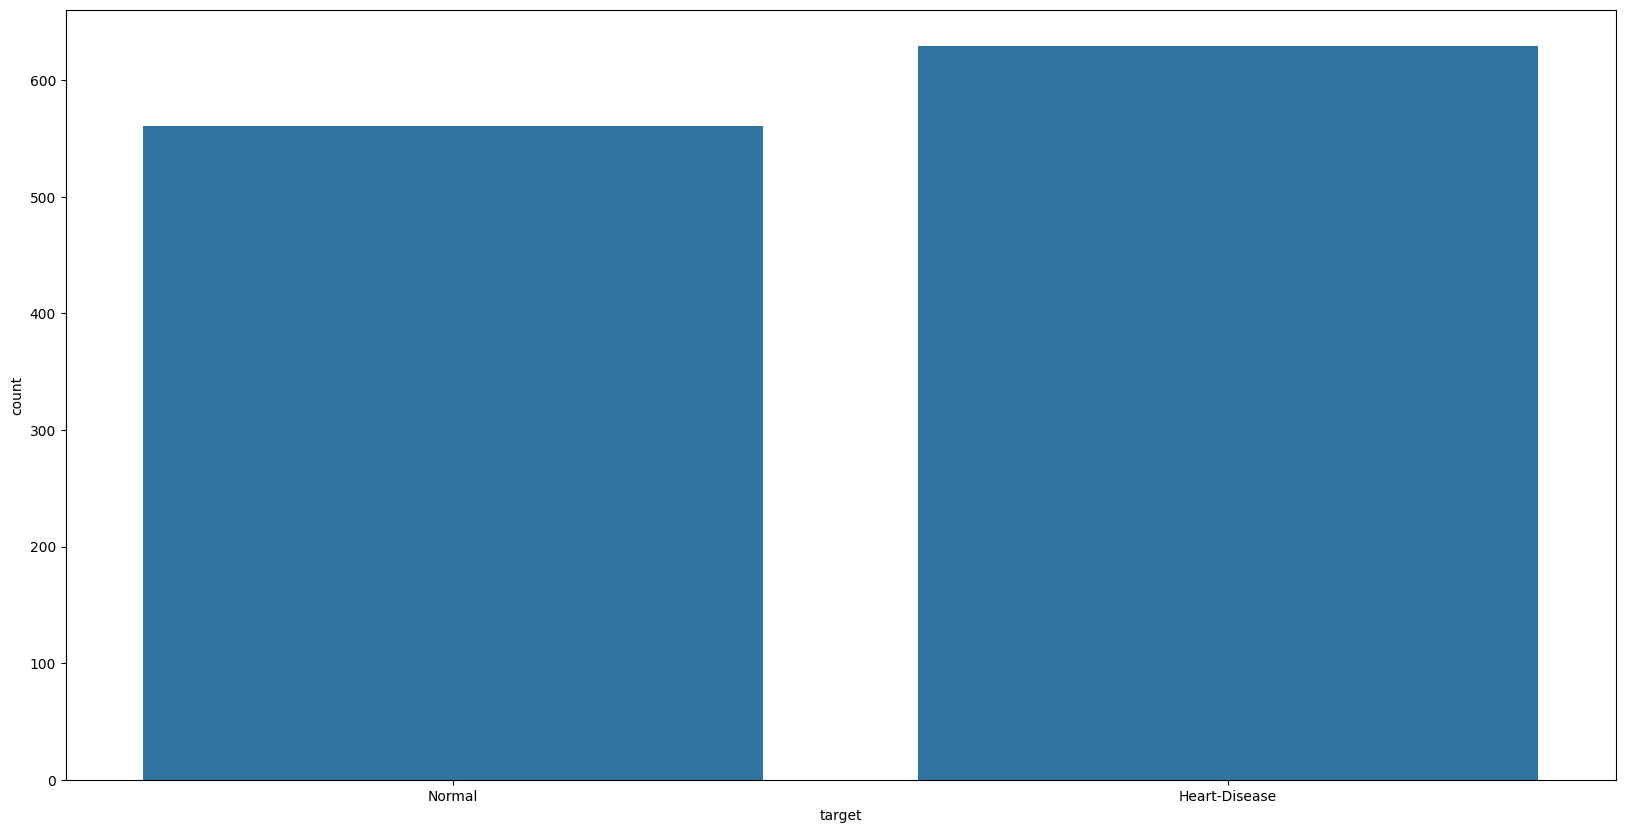

In [8]:
plt.figure(figsize = (20,10))
count_plt = sns.countplot(x = "target", data = df)
count_plt.set_xticklabels(["Normal", "Heart-Disease"])

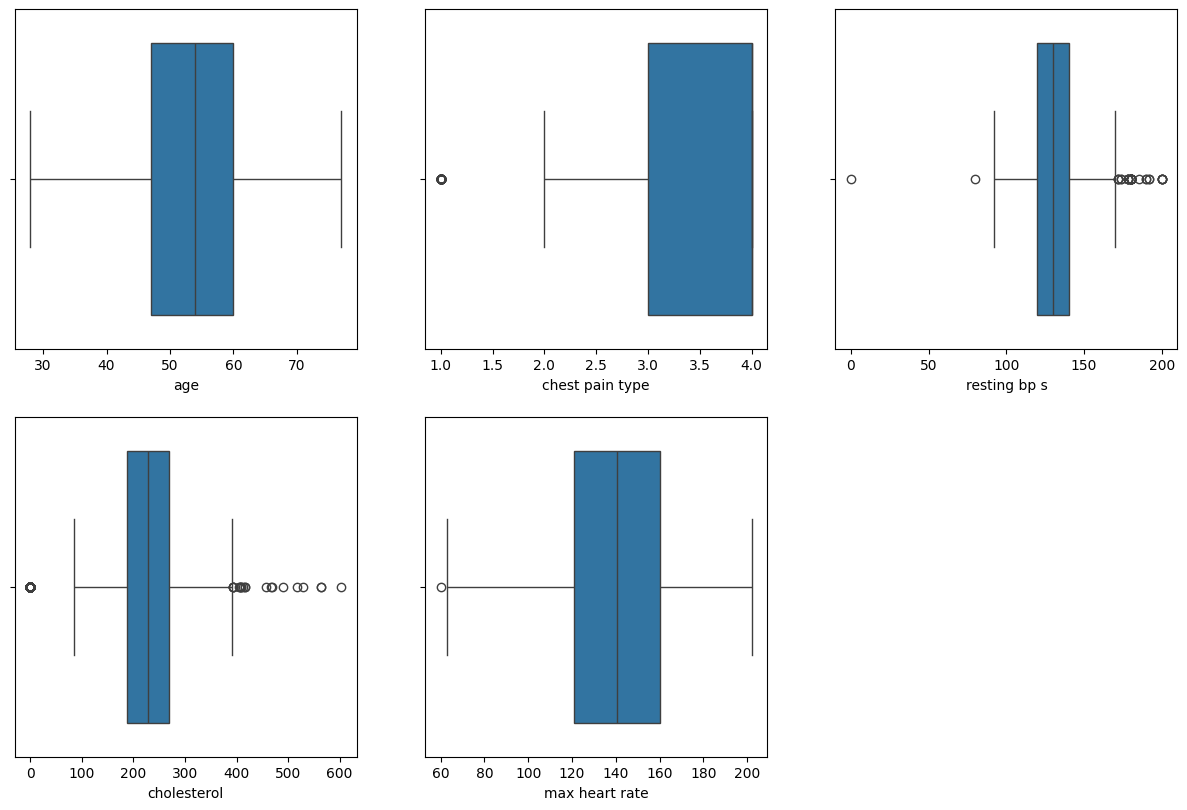

In [9]:
plt.figure(figsize = (15,15))

for i, col in enumerate(["age", 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate']):
  plt.subplot(3, 3, i+1)
  sns.boxplot(x = col, data = df)

<Axes: >

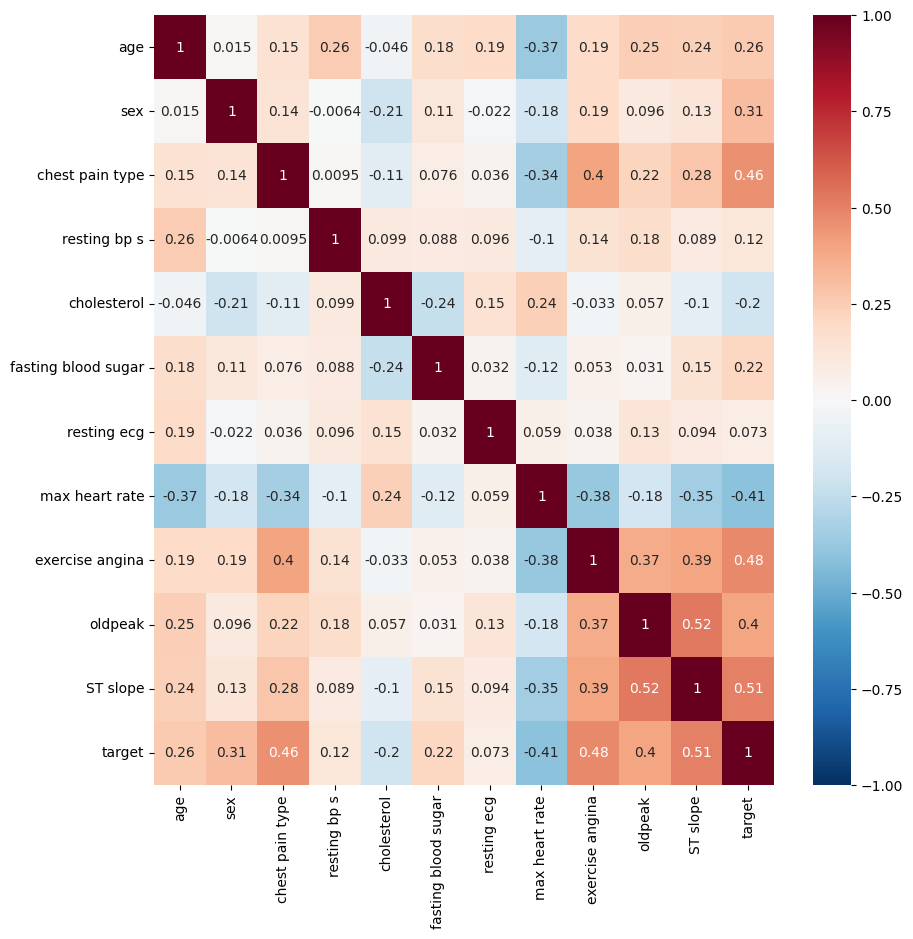

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), vmin = -1.0, cmap = 'RdBu_r', annot = True)

Observations From Graphs

- Cholestrol and resting bps have 0 values which is not possible.
- Negative oldpeak values hvae been made positive.

*Changing Cholesterol*

In [11]:
df_zero_chol  = df[df.cholesterol == 0]
rows = len(df_zero_chol.axes[0])
rows

172

In [12]:
df_no_zero_chol  = df[df.cholesterol != 0]
df_no_zero_chol['cholesterol'].describe()

count    1018.000000
mean      245.906680
std        57.244599
min        85.000000
25%       209.000000
50%       240.000000
75%       276.000000
max       603.000000
Name: cholesterol, dtype: float64

In [13]:
df['cholesterol'].replace(0, 240, inplace=True)

C:\Users\niran\AppData\Local\Temp\ipykernel_22272\1245943466.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cholesterol'].replace(0, 240, inplace=True)


*Changing Resting BPs*

In [14]:
df_zero_rbps  = df[df['resting bp s'] == 0]
rows = len(df_zero_rbps.axes[0])
rows

1

In [15]:
df_no_zero_chol  = df[df['resting bp s'] != 0]
df_no_zero_chol['cholesterol'].describe()

count    1189.000000
mean      245.057191
std        53.005305
min        85.000000
25%       214.000000
50%       240.000000
75%       270.000000
max       603.000000
Name: cholesterol, dtype: float64

In [16]:
df['resting bp s'].replace(0, 240, inplace=True)

C:\Users\niran\AppData\Local\Temp\ipykernel_22272\1074091387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['resting bp s'].replace(0, 240, inplace=True)


*Chaging Oldpeak*

In [17]:
df_neg_old  = df[df['oldpeak'] < 0]
rows = len(df_neg_old.axes[0])
rows

13

In [18]:
df['oldpeak'].describe()

count    1190.000000
mean        0.922773
std         1.086337
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

In [19]:
df[df < 0] = 0.6

# Feature Extraction

In [20]:
classes = list(df)
classes

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

In [21]:
x = df.drop('target',axis=1) #All_Features
y = df['target'] #Target

In [22]:
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending = False))

target                 1.000000
ST slope               0.505608
exercise angina        0.481467
chest pain type        0.460127
oldpeak                0.414743
sex                    0.311267
age                    0.262029
fasting blood sugar    0.216695
resting bp s           0.132765
cholesterol            0.086290
resting ecg            0.073059
max heart rate        -0.413278
Name: target, dtype: float64


Pearson Correlation

In [23]:
for feature in classes:
  pearson_coeff, p_value = stats.pearsonr(df['{}'.format(feature)], df['target'])
  print("Pearson Correlation For {}: {}".format(feature, pearson_coeff))
  print("P Value For {}: {}\n".format(feature, p_value))

Pearson Correlation For age: 0.26202877334264474
P Value For age: 3.90691336132864e-20

Pearson Correlation For sex: 0.3112668018071981
P Value For sex: 3.7911183896633365e-28

Pearson Correlation For chest pain type: 0.4601269819025252
P Value For chest pain type: 2.1353564228593306e-63

Pearson Correlation For resting bp s: 0.13276506945860594
P Value For resting bp s: 4.318003009628109e-06

Pearson Correlation For cholesterol: 0.08628977721709412
P Value For cholesterol: 0.0028908280767750935

Pearson Correlation For fasting blood sugar: 0.21669509337360807
P Value For fasting blood sugar: 4.1149288029271645e-14

Pearson Correlation For resting ecg: 0.07305948044896239
P Value For resting ecg: 0.011701909522721817

Pearson Correlation For max heart rate: -0.41327819138159383
P Value For max heart rate: 2.6941249233745444e-50

Pearson Correlation For exercise angina: 0.4814666005424993
P Value For exercise angina: 4.4567834982028776e-70

Pearson Correlation For oldpeak: 0.41474347281

In [24]:
logreg =  LogisticRegression(max_iter = 1000)
sfs1 = sfs(logreg,
           k_features = 7,
           forward=True,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv = 7)

sfs1 = sfs1.fit(x, y)

selected_feature_indices = list(sfs1.k_feature_idx_)

# Map indices to feature names
dependent_features = [x.columns[i] for i in selected_feature_indices]
print(dependent_features)

c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'oldpeak', 'ST slope']



[2024-05-19 21:00:52] Features: 7/7 -- score: -0.1689075630252101

In [25]:
dependent_features = ['sex', 'chest pain type', 'exercise angina', 'oldpeak', 'ST slope']

In [26]:
df_new = df[dependent_features]

# Training Model

Upon testing SVM classifier, Random Forest Classifier and Decision Tree Classifier models on both all the features and the extracted feature, it was found that The Random Forest Classifier gave higher accuracy for all the features. The Model is implemented based on the Random Forest Classifier.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 43)

model = RandomForestClassifier(n_estimators=125, random_state=42, max_features = 7, max_depth = 8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Test Data:", accuracy)

Accuracy Test Data: 0.9411764705882353


# Confusion Matrix Visualization

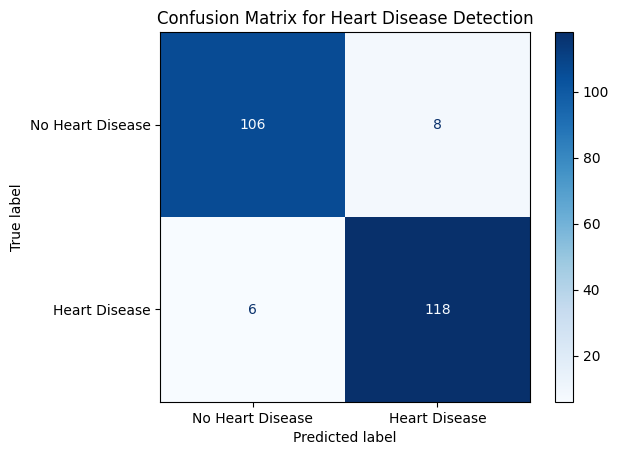

In [28]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Heart Disease Detection")
plt.show()

# Saving The Model

In [29]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                Feature  Importance
10             ST slope    0.279118
2       chest pain type    0.175539
7        max heart rate    0.098547
9               oldpeak    0.093950
3          resting bp s    0.082549
0                   age    0.073534
4           cholesterol    0.068549
8       exercise angina    0.059194
1                   sex    0.035927
6           resting ecg    0.018709
5   fasting blood sugar    0.014383


# Using The Model

In [30]:
import joblib

In [31]:
f_name = "heart_disease_prediction_model.pkl"
joblib.dump(model, f_name)

['heart_disease_prediction_model.pkl']

In [32]:
loaded_model = joblib.load('C:/Users/niran/Documents/VS Code/Python/Heart Disease Prediction Model/heart_disease_prediction_model.pkl')

In [33]:
columns = ['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

values_reshaped = np.array([65, 1, 2, 155, 240, 1, 2, 135, 1, 2.0, 2]).reshape(1,-1)
values = pd.DataFrame(values_reshaped, columns = columns)

In [34]:
if (loaded_model.predict(values)[0] == 0):
  print("No Heart Disease Detected")
else:
  print("Chance Of A Heart Disease Detected. Please Visit A Doctor!")

Chance Of A Heart Disease Detected. Please Visit A Doctor!
